In [1]:
import imageio
import pywt
import skimage as sci
import numpy as np
import radiomics 
import pydicom
import matplotlib.pyplot as plt
import cv2
from medpy.filter.smoothing import anisotropic_diffusion 
from skimage.io import imread
from skimage.color import rgb2gray
from scipy import ndimage
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from collections import OrderedDict
import pandas as pd

In [2]:
im =  pydicom.dcmread('P5.0') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)


extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector = extractor.execute(feat1, feat2)
names = list(featureVector.keys())
featureVector = list(featureVector.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted 

In [3]:
im =  pydicom.dcmread('P5.1') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor1 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor1.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector1 = extractor1.execute(feat1, feat2)
featureVector1 = list(featureVector1.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [4]:
im =  pydicom.dcmread('P6.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor2 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor2.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector2 = extractor2.execute(feat1, feat2)
featureVector2 = list(featureVector2.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [5]:
im =  pydicom.dcmread('P7.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor3 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor3.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector3 = extractor3.execute(feat1, feat2)
featureVector3 = list(featureVector3.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [6]:
im =  pydicom.dcmread('P8.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor4 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor4.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector4 = extractor4.execute(feat1, feat2)
featureVector4 = list(featureVector4.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [7]:
im =  pydicom.dcmread('P9.1') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor5 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor5.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector5 = extractor5.execute(feat1, feat2)
featureVector5 = list(featureVector5.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [8]:
im =  pydicom.dcmread('P10.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor6 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor6.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector6 = extractor6.execute(feat1, feat2)
featureVector6 = list(featureVector6.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [9]:
im =  pydicom.dcmread('P12.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor7 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor7.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector7 = extractor7.execute(feat1, feat2)
featureVector7 = list(featureVector7.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [10]:
im =  pydicom.dcmread('P13.1') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor8 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor8.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector8 = extractor8.execute(feat1, feat2)
featureVector8 = list(featureVector8.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [11]:
im =  pydicom.dcmread('P13.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor9 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor9.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector9 = extractor9.execute(feat1, feat2)
featureVector9 = list(featureVector9.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [12]:
im =  pydicom.dcmread('P14.1') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor10 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor10.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector10 = extractor10.execute(feat1, feat2)
featureVector10 = list(featureVector10.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [13]:
im =  pydicom.dcmread('P15.1') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor11 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor11.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector11 = extractor11.execute(feat1, feat2)
featureVector11 = list(featureVector11.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [14]:
im =  pydicom.dcmread('P17.2.dcm') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor12 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor12.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector12 = extractor12.execute(feat1, feat2)
featureVector12 = list(featureVector12.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [15]:
im =  pydicom.dcmread('P18.1.dcm') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor13 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor13.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector13 = extractor13.execute(feat1, feat2)
featureVector13 = list(featureVector13.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [16]:
im =  pydicom.dcmread('P19.2.dcm') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor14 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor14.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector14 = extractor14.execute(feat1, feat2)
featureVector14 = list(featureVector14.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [17]:
im =  pydicom.dcmread('P20.2.dcm') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor15 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor15.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector15 = extractor15.execute(feat1, feat2)
featureVector15 = list(featureVector15.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [18]:
im =  pydicom.dcmread('P20.3.dcm') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor16 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor16.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector16 = extractor16.execute(feat1, feat2)
featureVector16 = list(featureVector16.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [19]:
im =  pydicom.dcmread('P21.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor17 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor17.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector17 = extractor17.execute(feat1, feat2)
featureVector17 = list(featureVector17.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [20]:
im =  pydicom.dcmread('P21.3') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor18 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor18.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector18 = extractor18.execute(feat1, feat2)
featureVector18 = list(featureVector18.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [21]:
im =  pydicom.dcmread('PACIENTE1.3') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor19 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor19.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector19 = extractor19.execute(feat1, feat2)
featureVector19 = list(featureVector19.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [22]:
im =  pydicom.dcmread('PACIENTE1.5') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor20 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor20.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector20 = extractor20.execute(feat1, feat2)
featureVector20 = list(featureVector20.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [23]:
im =  pydicom.dcmread('5') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor21 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor21.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector21 = extractor21.execute(feat1, feat2)
featureVector21 = list(featureVector21.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [24]:
im =  pydicom.dcmread('P21.1') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor22 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor22.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector22 = extractor22.execute(feat1, feat2)
featureVector22 = list(featureVector22.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [25]:
im =  pydicom.dcmread('P9.2') #sick
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor23 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor23.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector23 = extractor23.execute(feat1, feat2)
featureVector23 = list(featureVector23.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [26]:
im =  pydicom.dcmread('P4.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor24 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor24.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector24 = extractor24.execute(feat1, feat2)
featureVector24 = list(featureVector24.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [27]:
im =  pydicom.dcmread('P4.1') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor25 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor25.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector25 = extractor25.execute(feat1, feat2)
featureVector25 = list(featureVector25.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [28]:
im =  pydicom.dcmread('P6.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor26 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor26.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector26 = extractor26.execute(feat1, feat2)
featureVector26 = list(featureVector26.values())


C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [29]:
im =  pydicom.dcmread('P7.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor27 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor27.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector27 = extractor27.execute(feat1, feat2)
featureVector27 = list(featureVector27.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [30]:
im =  pydicom.dcmread('P7.1') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor28 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor28.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector28 = extractor28.execute(feat1, feat2)
featureVector28 = list(featureVector28.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [31]:
im =  pydicom.dcmread('P8.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor29 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor29.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector29 = extractor29.execute(feat1, feat2)
featureVector29 = list(featureVector29.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [32]:
im =  pydicom.dcmread('P8.1') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor30 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor30.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector30 = extractor30.execute(feat1, feat2)
featureVector30 = list(featureVector30.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [33]:
im =  pydicom.dcmread('P9.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor31 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor31.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector31 = extractor31.execute(feat1, feat2)
featureVector31 = list(featureVector31.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [34]:
im =  pydicom.dcmread('PACIENTE1.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor32 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor32.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector32 = extractor32.execute(feat1, feat2)
featureVector32 = list(featureVector32.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [35]:
im =  pydicom.dcmread('PACIENTE1.4') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor33 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor33.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector33 = extractor33.execute(feat1, feat2)
featureVector33 = list(featureVector33.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [36]:
im =  pydicom.dcmread('10') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor34 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor34.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector34 = extractor34.execute(feat1, feat2)
featureVector34 = list(featureVector34.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [37]:
im =  pydicom.dcmread('11') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor35 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor35.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector35 = extractor35.execute(feat1, feat2)
featureVector35 = list(featureVector35.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [38]:
im =  pydicom.dcmread('13') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor36 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor36.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector36 = extractor36.execute(feat1, feat2)
featureVector36 = list(featureVector36.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [39]:
im =  pydicom.dcmread('14') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor37 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor37.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector37 = extractor37.execute(feat1, feat2)
featureVector37 = list(featureVector37.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [40]:
im =  pydicom.dcmread('2.dcm') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor38 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor38.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector38 = extractor38.execute(feat1, feat2)
featureVector38 = list(featureVector38.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [41]:
im =  pydicom.dcmread('3.dcm') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor39 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor39.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector39 = extractor39.execute(feat1, feat2)
featureVector39 = list(featureVector39.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [42]:
im =  pydicom.dcmread('9') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor40 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor40.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector40 = extractor40.execute(feat1, feat2)
featureVector40 = list(featureVector40.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [43]:
im =  pydicom.dcmread('P10.1') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor41 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor41.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector41 = extractor41.execute(feat1, feat2)
featureVector41 = list(featureVector41.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [44]:
im =  pydicom.dcmread('P11.4') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor42 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor42.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector42 = extractor42.execute(feat1, feat2)
featureVector42 = list(featureVector42.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [45]:
im =  pydicom.dcmread('P11.5') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor43 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor43.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector43 = extractor43.execute(feat1, feat2)
featureVector43 = list(featureVector43.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [46]:
im =  pydicom.dcmread('P12.0') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor44 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor44.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector44 = extractor44.execute(feat1, feat2)
featureVector44 = list(featureVector44.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [47]:
im =  pydicom.dcmread('P12.1') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor45 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor45.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector45 = extractor45.execute(feat1, feat2)
featureVector45 = list(featureVector45.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [48]:
im =  pydicom.dcmread('P12.5') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray')

################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor46 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor46.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector46 = extractor46.execute(feat1, feat2)
featureVector46 = list(featureVector46.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [49]:
im =  pydicom.dcmread('P16.1') #HEALTH
ima = im.pixel_array
imag = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)/255
crop = imag[90:583,266:495]

#Anisotropic diffusion
img_filtered = anisotropic_diffusion(crop, niter=300, kappa=20, gamma=0.02, voxelspacing=None, option=3)

########################## Clustering Process and PCA############
#Clustering and PCA
#Image segmentation
X_norm = normalize(img_filtered)
pca = PCA(.90)
lower_dimension_data = pca.fit_transform(X_norm)
lower_dimension_data.shape
approximation = pca.inverse_transform(lower_dimension_data)

# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
kmeans6 =  KMeans(n_clusters=1, init ='k-means++',algorithm = 'full').fit(approximation)
clustered6 = kmeans6.cluster_centers_[kmeans6.labels_]

########################## PCA and Filtering in clustered image ############
#Clustering and PCA
#Image segmentation
X_norm1 = normalize(clustered6)
pca1 = PCA(.90)
lower_dimension_data1 = pca.fit_transform(X_norm1)
lower_dimension_data1.shape
approximation1 = pca.inverse_transform(lower_dimension_data1)

#Anisotropic diffusion
img_filtered1 = anisotropic_diffusion(approximation1, niter=300, kappa=20, gamma=0.25, voxelspacing=None, option=3)


########################## Thresholding and final image ###########################
#cambiar a 0,75 para dejar solo cuadro, analizar consolidaciones
_, binary = cv2.threshold(img_filtered1, 0.071, 1, cv2.THRESH_TOZERO)
_, binary1 = cv2.threshold(binary, 0, 1, cv2.THRESH_BINARY)

final = binary1 * crop

#plt.figure()
#plt.subplot(131)
#plt.imshow(crop, cmap = 'gray')
#plt.subplot(132)
#plt.imshow(img_filtered, cmap = 'gray')
#plt.subplot(133)
#plt.imshow(final, cmap = 'gray


################################# Feature Extraction #################################
import os
import SimpleITK as sitk
import six
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape
from radiomics import featureextractor

settings =  { 'normalize':True }
feat1=sitk.GetImageFromArray(crop, isVector=False)
feat2=sitk.GetImageFromArray(binary1, isVector=False)

extractor47 = featureextractor.RadiomicsFeatureExtractor(**settings)
extractor47.enableImageTypes(Original={}, LoG={}, Wavelet={})
featureVector47 = extractor47.execute(feat1, feat2)
featureVector47 = list(featureVector47.values())

C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Anaconda\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Jo

In [50]:
import pandas as pd
df = pd.DataFrame(columns = [names])
df.loc[len(df)] = featureVector
df.loc[len(df)]= featureVector24
df.loc[len(df)]= featureVector1
df.loc[len(df)]= featureVector25
df.loc[len(df)]= featureVector2
df.loc[len(df)]= featureVector26
df.loc[len(df)]= featureVector3
df.loc[len(df)]= featureVector27
df.loc[len(df)]= featureVector4
df.loc[len(df)]= featureVector28
df.loc[len(df)]= featureVector5
df.loc[len(df)]= featureVector29
df.loc[len(df)]= featureVector6
df.loc[len(df)]= featureVector30
df.loc[len(df)]= featureVector7
df.loc[len(df)]= featureVector31
df.loc[len(df)]= featureVector8
df.loc[len(df)]= featureVector32
df.loc[len(df)]= featureVector9
df.loc[len(df)]= featureVector33
df.loc[len(df)]= featureVector10
df.loc[len(df)]= featureVector34
df.loc[len(df)]= featureVector11
df.loc[len(df)]= featureVector35
df.loc[len(df)]= featureVector12
df.loc[len(df)]= featureVector36
df.loc[len(df)]= featureVector13
df.loc[len(df)]= featureVector37
df.loc[len(df)]= featureVector14
df.loc[len(df)]= featureVector38
df.loc[len(df)]= featureVector15
df.loc[len(df)]= featureVector39
df.loc[len(df)]= featureVector16
df.loc[len(df)]= featureVector40
df.loc[len(df)]= featureVector17
df.loc[len(df)]= featureVector41
df.loc[len(df)]= featureVector18
df.loc[len(df)]= featureVector42
df.loc[len(df)]= featureVector19
df.loc[len(df)]= featureVector43
df.loc[len(df)]= featureVector20
df.loc[len(df)]= featureVector44
df.loc[len(df)]= featureVector21
df.loc[len(df)]= featureVector45
df.loc[len(df)]= featureVector22
df.loc[len(df)]= featureVector46
df.loc[len(df)]= featureVector23
df.loc[len(df)]= featureVector47
vector = range(115)
df_final = df.drop(df.columns[[vector]], axis='columns')
#0:health 1: sick
df_final['target'] = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
target = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]


C:\Anaconda\lib\site-packages\pandas\core\indexes\multi.py:2013: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_codes = [level_codes[key] for level_codes in self.codes]


In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
X = df_final
y = target
X.shape
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

(48, 107)

In [52]:
import random
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import percentile
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix


random.seed(527)
modelKNN = KNeighborsClassifier(n_neighbors=20)
modelNB = BernoulliNB(alpha = 0.1, binarize = 0.37)
modelTree = tree.DecisionTreeClassifier(random_state=2)
modelADA = AdaBoostClassifier(n_estimators=45)
modelRF = RandomForestClassifier(n_estimators=50, random_state=2)
modelGBC = GradientBoostingClassifier()


##KNN
random.seed(527)
scoresKNN = cross_validate(modelKNN, X_new, y, cv=5,
                           scoring=('accuracy', 'roc_auc'),                       
                           return_train_score=False)

quartilesKNN = percentile(scoresKNN['test_accuracy'], [25, 50, 75])
avKNN = scoresKNN['test_accuracy'].mean()
minKNN, maxKNN = scoresKNN['test_accuracy'].min(), scoresKNN['test_accuracy'].max()


#NB
random.seed(527)
scoresNB = cross_validate(modelNB, X_new, y, cv=5,
                           scoring=('accuracy', 'roc_auc'),                       
                           return_train_score=False)
quartilesNB = percentile(scoresNB['test_accuracy'], [25, 50, 75])
avNB = scoresNB['test_accuracy'].mean()
minNB, maxNB = scoresNB['test_accuracy'].min(), scoresNB['test_accuracy'].max()

#DecisionTree
random.seed(527)
scoresTree = cross_validate(modelTree, X_new, y, cv=5,
                           scoring=('accuracy', 'roc_auc'),                       
                           return_train_score=False)
quartilesTree = percentile(scoresTree['test_accuracy'], [25, 50, 75])
avTree = scoresTree['test_accuracy'].mean()
minTree, maxTree = scoresTree['test_accuracy'].min(),scoresTree['test_accuracy'].max()

#AdaBoost
random.seed(527)
scoresADA= cross_validate(modelADA, X_new, y, cv=5,
                           scoring=('accuracy', 'roc_auc'),                       
                           return_train_score=False)
quartilesADA = percentile(scoresADA['test_accuracy'], [25, 50, 75])
avADA = scoresADA['test_accuracy'].mean()
minADA, maxADA = scoresADA['test_accuracy'].min(), scoresADA['test_accuracy'].max()

#RandomForest
random.seed(527)
scoresRF = cross_validate(modelRF, X_new, y, cv=5,
                           scoring=('accuracy', 'roc_auc'),                       
                           return_train_score=True)
quartilesRF = percentile(scoresRF['test_accuracy'], [25, 50, 75])
avRF = scoresRF['test_accuracy'].mean()
minRF, maxRF = scoresRF['test_accuracy'].min(), scoresRF['test_accuracy'].max()

#GradientBoostingClassifier
random.seed(527)
scoresGBC = cross_validate(modelGBC, X_new, y, cv=5,
                           scoring=('accuracy', 'roc_auc'),                       
                           return_train_score=True)
quartilesGBC = percentile(scoresGBC['test_accuracy'], [25, 50, 75])
avGBC = scoresGBC['test_accuracy'].mean()
minGBC, maxGBC = scoresGBC['test_accuracy'].min(), scoresGBC['test_accuracy'].max()


{'whiskers': [<matplotlib.lines.Line2D at 0x29425212748>,
 'caps': [<matplotlib.lines.Line2D at 0x2942521e748>,
 'boxes': [<matplotlib.lines.Line2D at 0x29425207848>,
 'medians': [<matplotlib.lines.Line2D at 0x2942521ee48>,
 'fliers': [<matplotlib.lines.Line2D at 0x294252269c8>,
 'means': []}

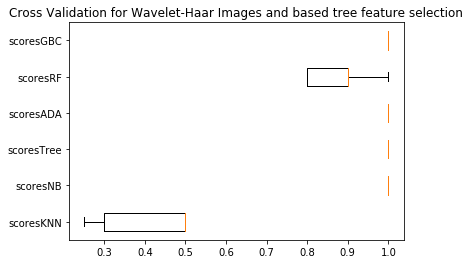

In [53]:
data = [scoresKNN['test_accuracy'], scoresNB['test_accuracy'], scoresTree['test_accuracy'], scoresADA['test_accuracy'], 
        scoresRF['test_accuracy'], scoresGBC['test_accuracy']]
fig1, ax1= plt.subplots()
ax1.set_title('Cross Validation for Wavelet-Haar Images and based tree feature selection')
labels = ['scoresKNN', 'scoresNB', 'scoresTree', 'scoresADA', 'scoresRF', 'scoresGBC']
ax1.boxplot(data, vert=False, labels = labels)


In [55]:
print(quartilesRF)
print(avRF)
print(minRF)
print(maxRF)

[0.8 0.9 0.9]
0.8800000000000001
0.8
1.0
